# OULAD Dataset Analysis

In [1]:
import pandas as pd
import numpy as np

## General

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31482 entries, 0 to 31481
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   code_module           31482 non-null  object
 1   code_presentation     31482 non-null  object
 2   gender                31482 non-null  object
 3   region                31482 non-null  object
 4   highest_education     31482 non-null  object
 5   imd_band              31482 non-null  object
 6   age_band              31482 non-null  object
 7   num_of_prev_attempts  31482 non-null  int64 
 8   studied_credits       31482 non-null  int64 
 9   disability            31482 non-null  object
 10  final_result          31482 non-null  object
dtypes: int64(2), object(9)
memory usage: 2.6+ MB
target count
Pass           11830
Withdrawn       9920
Fail            6907
Distinction     2825
Name: final_result, dtype: int64


<AxesSubplot:ylabel='final_result'>

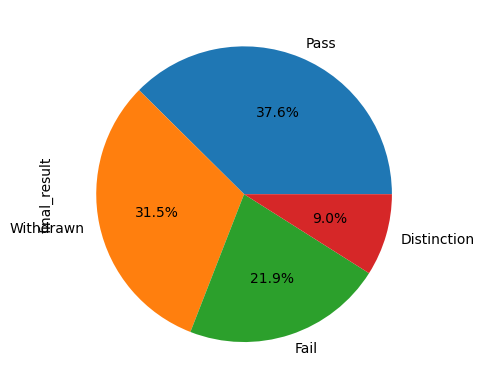

In [2]:
df = pd.read_csv("../Cleaned/OULAD/OULAD.csv", skipinitialspace=True)
df.info()
print("target count")
print(df['final_result'].value_counts())
df['final_result'].value_counts().plot(kind='pie',autopct='%1.1f%%')

## gender

M    17067
F    14415
Name: gender, dtype: int64


<AxesSubplot:ylabel='gender'>

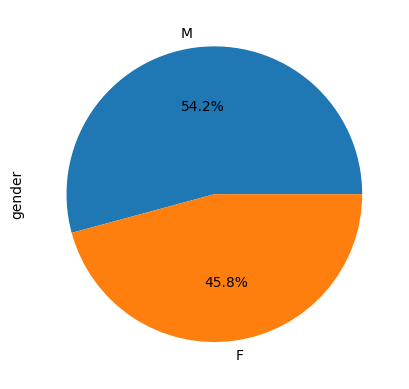

In [3]:
print(df['gender'].value_counts())
df['gender'].value_counts().plot(kind='pie',autopct='%1.1f%%')

Considering gender = M

Pass           6239
Withdrawn      5499
Fail           3841
Distinction    1488
Name: final_result, dtype: int64


<AxesSubplot:ylabel='final_result'>

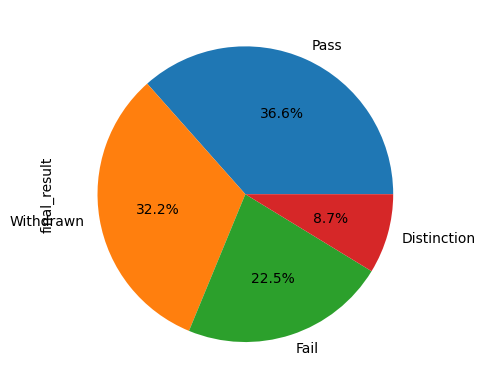

In [4]:
print(df.loc[df['gender']=="M"]['final_result'].value_counts())
df.loc[df['gender']=="M"]['final_result'].value_counts().plot(kind='pie',autopct='%1.1f%%')

Considering gender = F

Pass           5591
Withdrawn      4421
Fail           3066
Distinction    1337
Name: final_result, dtype: int64


<AxesSubplot:ylabel='final_result'>

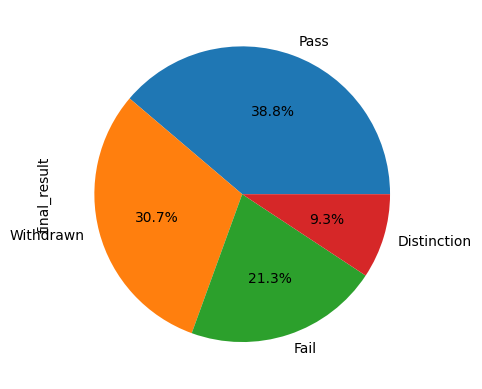

In [5]:
print(df.loc[df['gender']=="F"]['final_result'].value_counts())
df.loc[df['gender']=="F"]['final_result'].value_counts().plot(kind='pie',autopct='%1.1f%%')

### Odds Ratio

- measures the association between exposure and outcome
- represents the odds that an outcome will happen given a specific exposure compared to the odds of an outcome happening without such exposure

OR = (p(y+|s0)p(y-|s1)/(p(y+|s1)p(y-|s0)))

- OR = 1 --> Exposure has no effect on the odds of an outcome
- OR > 1 --> Exposure causes higher odds of an outcome
- OR < 1 --> Exposure causes lower odds of an outcome

let y+ = pass | distinction

let y- = not pass & not distionction

let s0 = M

let s1 = F

In [6]:
# p(y+|s0) -> p(+|M)
p1 = len(df.loc[(df['gender']=="M") & ((df['final_result']=="Pass") | (df['final_result']=="Distinction"))]) / len(df.loc[df['gender']=="M"])
#print(p1)
# p(y-|s1) -> p(-|F)
p2 = len(df.loc[(df['gender']=="F") & (df['final_result']!="Pass") & (df['final_result']!="Distinction")]) / len(df.loc[df['gender']=="F"])
#print(p2)
# p(y+|s1) -> p(+|F)
p3 = len(df.loc[(df['gender']=="F") & ((df['final_result']=="Pass") | (df['final_result']=="Distinction"))]) / len(df.loc[df['gender']=="F"])
#print(p3)
# p(y-|s0) -> p(-|M)
p4 = len(df.loc[(df['gender']=="M") & (df['final_result']!="Pass") & (df['final_result']!="Distinction")]) / len(df.loc[df['gender']=="M"])
#print(p4)

oddsratio = (p1 * p2) / (p3 * p4)
print("OR: {:.3f}".format(oddsratio))

OR: 0.894


In [7]:
#OR for s0 = Female
oddsratio = (p3 * p4) / (p1 * p2)
print("OR: {:.3f}".format(oddsratio))

OR: 1.119


### Impact Ratio

- is the ratio of positive outcomes for the protected group over the general group
- the closer this ratio is to one, it means the dataset is less biased

IR = p(y+|s0)/p(y+|s1)

- IR = 0 --> Maximum discrimination
- IR = 1 --> No discrimination
- IR = +INF --> Reverse discrimination

let y+ = pass | distinction

let y- = not pass & not distinction

let s0 = Male

let s1 = Female

In [8]:
impactratio = p1 / p3
print("IR: {:.3f}".format(impactratio))

IR: 0.942


### Proxies

Most of the proxies found for sex include (a combination of):
 - 

Best model (min depth) found with a node at depth 2 with 36 samples.

	** age_band_55<= > 0.5 , region_London Region > 0.5 ,  #impurity: 0.0, #samples: 36.

Best model (max sample) found with 124 sample in a node at depth 4.

	** age_band_55<= > 0.5 , region_South Region <= 0.5 , region_West Midlands Region <= 0.5 , imd_band_50-60% <= 0.5 ,  #impurity: 0.0, #samples: 124.
        

For proxy: age_band == 55<= & region == London Region

M    36
Name: gender, dtype: int64


<AxesSubplot:ylabel='gender'>

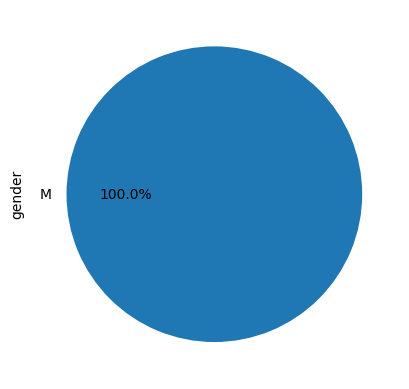

In [9]:
print(df.loc[(df['age_band']=="55<=") & (df['region']=="London Region")]['gender'].value_counts())
df.loc[(df['age_band']=="55<=") & (df['region']=="London Region")]['gender'].value_counts().plot(kind='pie',autopct='%1.1f%%')

Pass           12
Withdrawn      11
Fail            7
Distinction     6
Name: final_result, dtype: int64


<AxesSubplot:ylabel='final_result'>

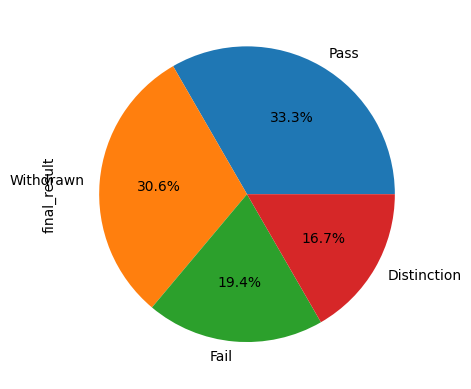

In [10]:
print(df.loc[(df['age_band']=="55<=") & (df['region']=="London Region")]['final_result'].value_counts())
df.loc[(df['age_band']=="55<=") & (df['region']=="London Region")]['final_result'].value_counts().plot(kind='pie',autopct='%1.1f%%')

### Odds Ratio

- measures the association between exposure and outcome
- represents the odds that an outcome will happen given a specific exposure compared to the odds of an outcome happening without such exposure

OR = (p(y+|s0)p(y-|s1)/(p(y+|s1)p(y-|s0)))

- OR = 1 --> Exposure has no effect on the odds of an outcome
- OR > 1 --> Exposure causes higher odds of an outcome
- OR < 1 --> Exposure causes lower odds of an outcome

let y+ = pass | distinction

let y- = not pass & not distinction

let s0 = belongs to proxy

let s1 = does not belong to proxy

In [11]:
# p(y+|s0) -> p(+|Proxy)
p1 = len(df.loc[(df['age_band']=="55<=") & (df['region']=="London Region") & ((df['final_result']=="Pass") | (df['final_result']=="Distinction"))]) / len(df.loc[(df['age_band']=="55<=") & (df['region']=="London Region")])
#print(p1)
# p(y-|s1) -> p(-|!Proxy)
p2 = len(df.loc[((df['age_band']!="55<=") | (df['region']!="London Region")) & (df['final_result']!="Pass") & (df['final_result']!="Distinction")]) / len(df.loc[((df['age_band']!="55<=") | (df['region']!="London Region"))])
#print(p2)
# p(y+|s1) -> p(+|!Proxy)
p3 = len(df.loc[((df['age_band']!="55<=") | (df['region']!="London Region")) & ((df['final_result']=="Pass") | (df['final_result']=="Distinction"))]) / len(df.loc[((df['age_band']!="55<=") | (df['region']!="London Region"))])
#print(p3)
# p(y-|s0) -> p(-|Proxy)
p4 = len(df.loc[(df['age_band']=="55<=") & (df['region']=="London Region") & (df['final_result']!="Pass") & (df['final_result']!="Distinction")]) / len(df.loc[(df['age_band']=="55<=") & (df['region']=="London Region")])
#print(p4)

oddsratio = (p1 * p2) / (p3 * p4)
print("OR: {:.3f}".format(oddsratio))

OR: 1.148


### Impact Ratio

- is the ratio of positive outcomes for the protected group over the general group
- the closer this ratio is to one, it means the dataset is less biased

IR = p(y+|s0)/p(y+|s1)

- IR = 0 --> Maximum discrimination
- IR = 1 --> No discrimination
- IR = +INF --> Reverse discrimination

let y+ = pass | distinction

let y- = not pass & not distinction

let s0 = belongs to proxy

let s1 = does not belong to proxy

In [12]:
impactratio = p1 / p3
print("IR: {:.3f}".format(impactratio))

IR: 1.074


For proxy age_band == 55<= & region != South Region & region != West Midlands Region & imd_band != 50-60%

M    124
Name: gender, dtype: int64


<AxesSubplot:ylabel='gender'>

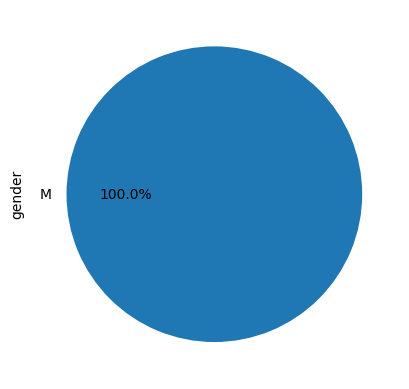

In [13]:
print(df.loc[(df['age_band']=="55<=") & (df['region']!="South Region") & (df['region']!="West Midlands Region") & (df['imd_band']!="50-60%")]['gender'].value_counts())
df.loc[(df['age_band']=="55<=") & (df['region']!="South Region") & (df['region']!="West Midlands Region") & (df['imd_band']!="50-60%")]['gender'].value_counts().plot(kind='pie',autopct='%1.1f%%')

Pass           56
Withdrawn      32
Distinction    22
Fail           14
Name: final_result, dtype: int64


<AxesSubplot:ylabel='final_result'>

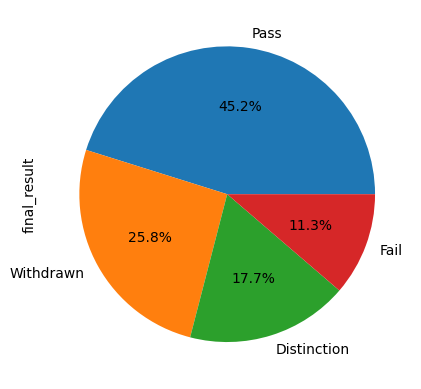

In [14]:
print(df.loc[(df['age_band']=="55<=") & (df['region']!="South Region") & (df['region']!="West Midlands Region") & (df['imd_band']!="50-60%")]['final_result'].value_counts())
df.loc[(df['age_band']=="55<=") & (df['region']!="South Region") & (df['region']!="West Midlands Region") & (df['imd_band']!="50-60%")]['final_result'].value_counts().plot(kind='pie',autopct='%1.1f%%')

### Odds Ratio

- measures the association between exposure and outcome
- represents the odds that an outcome will happen given a specific exposure compared to the odds of an outcome happening without such exposure

OR = (p(y+|s0)p(y-|s1)/(p(y+|s1)p(y-|s0)))

- OR = 1 --> Exposure has no effect on the odds of an outcome
- OR > 1 --> Exposure causes higher odds of an outcome
- OR < 1 --> Exposure causes lower odds of an outcome

let y+ = pass | distinction

let y- = not pass & not distinction

let s0 = belongs to proxy

let s1 = does not belong to proxy

In [15]:
# (df['age_band']=="55<=") & (df['region']!="South Region") & (df['region']!="West Midlands Region") & (df['imd_band']!="50-60%")
# p(y+|s0) -> p(+|Proxy)
p1 = len(df.loc[(df['age_band']=="55<=") & (df['region']!="South Region") & (df['region']!="West Midlands Region") & (df['imd_band']!="50-60%") & ((df['final_result']=="Pass") | (df['final_result']=="Distinction"))]) / len(df.loc[(df['age_band']=="55<=") & (df['region']!="South Region") & (df['region']!="West Midlands Region") & (df['imd_band']!="50-60%")])
#print(p1)
# p(y-|s1) -> p(-|!Proxy)
p2 = len(df.loc[((df['age_band']!="55<=") | (df['region']=="South Region") | (df['region']=="West Midlands Region") | (df['imd_band']=="50-60%")) & (df['final_result']!="Pass") & (df['final_result']!="Distinction")]) / len(df.loc[((df['age_band']!="55<=") | (df['region']=="South Region") | (df['region']=="West Midlands Region") | (df['imd_band']=="50-60%"))])
#print(p2)
# p(y+|s1) -> p(+|!Proxy)
p3 = len(df.loc[((df['age_band']!="55<=") | (df['region']=="South Region") | (df['region']=="West Midlands Region") | (df['imd_band']=="50-60%")) & ((df['final_result']=="Pass") | (df['final_result']=="Distinction"))]) / len(df.loc[((df['age_band']!="55<=") | (df['region']=="South Region") | (df['region']=="West Midlands Region") | (df['imd_band']=="50-60%"))])
#print(p3)
# p(y-|s0) -> p(-|Proxy)
p4 = len(df.loc[(df['age_band']=="55<=") & (df['region']!="South Region") & (df['region']!="West Midlands Region") & (df['imd_band']!="50-60%") & (df['final_result']!="Pass") & (df['final_result']!="Distinction")]) / len(df.loc[(df['age_band']=="55<=") & (df['region']!="South Region") & (df['region']!="West Midlands Region") & (df['imd_band']!="50-60%")])
#print(p4)

oddsratio = (p1 * p2) / (p3 * p4)
print("OR: {:.3f}".format(oddsratio))

OR: 1.952


### Impact Ratio

- is the ratio of positive outcomes for the protected group over the general group
- the closer this ratio is to one, it means the dataset is less biased

IR = p(y+|s0)/p(y+|s1)

- IR = 0 --> Maximum discrimination
- IR = 1 --> No discrimination
- IR = +INF --> Reverse discrimination

let y+ = pass | distinction

let y- = not pass & not distinction

let s0 = belongs to proxy

let s1 = does not belong to proxy

In [16]:
impactratio = p1 / p3
print("IR: {:.3f}".format(impactratio))

IR: 1.353
